### <center> Лабораторна робота №2_2 <center>

### Завдання 1, Завдання 2

![task1](task1.png)

![task2](task2.png)

In [368]:
import numpy as np 
import scipy 
from numpy import linspace, array 
from pylab import plot, xlabel, ylabel, legend, show 
from scipy.integrate import odeint 
from scipy import linalg
import sympy as sym
sym.init_printing() 

In [369]:
# функція для обчислення Якобіана: 
def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

In [370]:
# нульова матриця: 
C = np.zeros((2,2))
# часовий інтервал 
t0 = 0
t1 = 20
N = 2000
time = linspace(t0, t1, N+1)
# початкові значення 
x0 = 10
y0 = 6
r0 = np.array([x0, y0], float) 

#### Система (1)

![model](model_1.png)

##### Особливі точки

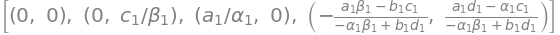

In [371]:
# символьні змінні
x,y = sym.symbols('x,y') #N1, N2
a1 = sym.Symbol('a1') #a 
b1 = sym.Symbol('b1') #b 
alpha1 = sym.Symbol('alpha1') #alpha
c1 = sym.Symbol('c1') #c 
beta1 = sym.Symbol('beta1') #beta
d1 = sym.Symbol('d1') #d

# вирази: 
f = sym.Eq(a1*x-b1*x*y-alpha1*x**2, 0)
g = sym.Eq(c1*y-d1*x*y-beta1*y**2, 0)
sym.solve([f,g],(x,y))

In [372]:
# Параметри моделі 
a = 3.8 
b = 1.9 
c = 2 
d = 1.3
alpha = 0.16 
beta = 0.16

In [373]:
# підставляємо параметри: 
f = sym.Eq(a*x-b*x*y-alpha*x**2, 0)
g = sym.Eq(c*y-d*x*y-beta*y**2, 0)
sym.solve([f,g],(x,y))

In [374]:
D = sym.solve([f, g], (x,y)) 
coord_list = [v.round(2) for t in D for v in t]
coord_list

In [375]:
# Якобіан: 
Jacobian('x , y', ['3.8*x-1.9*x*y-0.16*x**2','2*y-1.3*x*y-0.16*y**2'])

⎡-0.32⋅x - 1.9⋅y + 3.8        -1.9⋅x       ⎤
⎢                                          ⎥
⎣       -1.3⋅y          -1.3⋅x - 0.32⋅y + 2⎦

In [376]:
# функція для визначення типу особливих точок: 
def type_point(x, y): 
  C[0,0] = -0.32*x-1.9*y+3.8
  C[0,1] = -1.9*x
  C[1,0] = -1.3*y
  C[1,1] = -1.3*x-0.32*y+2
  return np.linalg.eigvals(C) 

In [377]:
type_point(0.0, 0.0) 

array([3.8, 2. ])

In [378]:
type_point(0.0, 12.5) 

array([ -2.  , -19.95])

In [379]:
type_point(1.31, 1.89) 

array([ 2.21442969, -2.73242969])

In [380]:
type_point(23.75, 0.0) 

array([ -3.8  , -28.875])

##### Розв'язки, графіки та фазові портрети 

In [381]:
# функція для обчислення правих частин системи
def right(r, t, a, b, alpha, c, d, beta):
  x = r[0] # N1 - перший елемент масива 
  y = r[1] # N2 - другий елемент масива
  fx = a*x-b*x*y-alpha*y**2 # перше рівняння
  fy = c*y-d*x*y-beta*y**2 # друге рівняння
  return array([fx, fy], float)

In [382]:
# функція для розв'язку системи ДР
def dr(a, b, alpha, c, d, beta):
  r = odeint(right, r0, time, args = (a, b, alpha, c, d, beta))
  return r

In [383]:
# функція для побудови графіків 
def pl(r):
  plot(time, r[:,0], 'b', label = 'x')
  plot(time, r[:,1], 'r', label = 'y')
  xlabel('time')
  ylabel('x, y')
  legend()
  show()

In [384]:
# функція для побудови фазових портретів 
def phase_portrait(r): 
  plot(r[:,0], r[:,1])
  xlabel('x')
  ylabel('y')
  show()

In [385]:
# розв'язок: 
r = dr(a, b, alpha, c, d, beta)

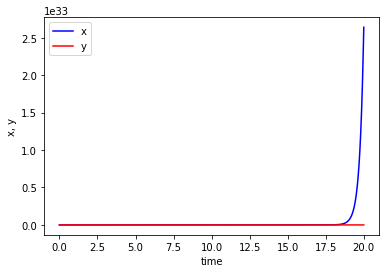

In [386]:
# графік: 
pl(r)

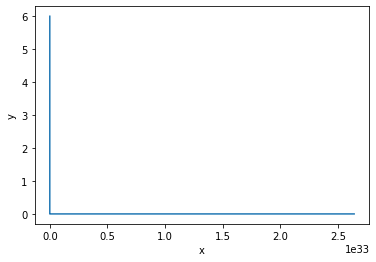

In [387]:
# фазовий портрет: 
phase_portrait(r)

#### Система (2)

![model](model_2.png)

##### Особливі точки

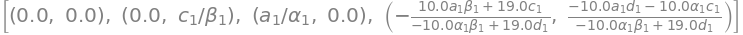

In [388]:
# символьні змінні
x,y = sym.symbols('x,y') #N1, N2
a1 = sym.Symbol('a1') #a 
b1 = sym.Symbol('b1') #b 
alpha1 = sym.Symbol('alpha1') #alpha
c1 = sym.Symbol('c1') #c 
beta1 = sym.Symbol('beta1') #beta
d1 = sym.Symbol('d1') #d

# вирази: 
f = sym.Eq(x*(a1-alpha1*x+b*y), 0)
g = sym.Eq(y*(c1+d1*x-beta1*y), 0)
sym.solve([f,g],(x,y))

In [389]:
# Параметри моделі 
a = 3.8 
b = 1.9 
c = 2 
d = 1.3
alpha = 0.16 
beta = 0.16

In [390]:
# підставляємо параметри: 
f = sym.Eq(x*(a-alpha*x+b*y), 0)
g = sym.Eq(y*(c+d*x-beta*y), 0)
sym.solve([f,g],(x,y))

In [391]:
D = sym.solve([f, g], (x,y)) 
coord_list = [v.round(2) for t in D for v in t]
coord_list 

In [392]:
# Якобіан: 
Jacobian('x , y', ['x*(3.8-0.16*x+1.9*y)','y*(2+1.3*x-0.16*y)']) 

⎡-0.32⋅x + 1.9⋅y + 3.8        1.9⋅x       ⎤
⎢                                         ⎥
⎣        1.3⋅y          1.3⋅x - 0.32⋅y + 2⎦

In [393]:
# функція для визначення типу особливих точок: 
def type_point(x, y): 
  C[0,0] = -0.32*x+1.9*y+3.8
  C[0,1] = 1.9*x
  C[1,0] = 1.3*y
  C[1,1] = 1.3*x-0.32*y+2
  return np.linalg.eigvals(C) 

In [394]:
type_point(-1.8, -2.15) 

array([-2.77237843,  3.41137843])

In [395]:
type_point(0, 0) 

array([3.8, 2. ])

In [396]:
type_point(0.0, 12.5) 

array([-2.  , 27.55])

In [397]:
type_point(23.75, 0.0) 

array([-3.8  , 32.875])

##### Розв'язки, графіки та фазові портрети 

In [398]:
# функція для обчислення правих частин системи
def right(r, t, a, alpha, b, c, d, beta):
  x = r[0] # N1 - перший елемент масива 
  y = r[1] # N2 - другий елемент масива
  fx = x*(a-alpha*x+b*y) # перше рівняння
  fy = y*(c+d*x-beta*y) # друге рівняння
  return array([fx, fy], float)

In [399]:
# функція для розв'язку системи ДР
def dr(a, alpha, b, c, d, beta):
  r = odeint(right, r0, time, args = (a, alpha, b, c, d, beta))
  return r

In [400]:
# розв'язок: 
r = dr(a, b, alpha, c, d, beta)

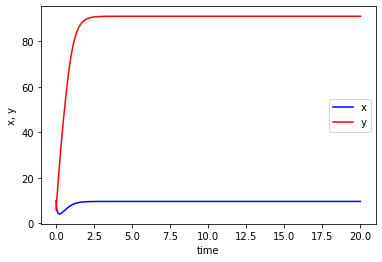

In [401]:
# графік: 
pl(r) 

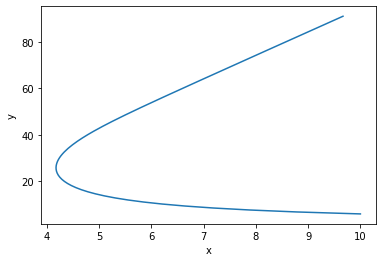

In [402]:
# фазовий портрет:  
phase_portrait(r)

### Завдання 3

![task3](task3.png)

#### Система (1)

![model](model_1_2.png)

##### Розв'язки, графіки та фазовий портрет

In [403]:
# функція для обчислення правих частин системи
def right(r, t, eps, gamma, n):
  x = r[0] # N1 - перший елемент масива 
  y = r[1] # N2 - другий елемент масива
  fx = x-x*y-eps*x**2 # перше рівняння
  fy = -gamma*y+(x*y**2)/(n+y) # друге рівняння
  return array([fx, fy], float)

In [404]:
# функція для розв'язку системи ДР
def dr(eps, gamma, n):
  r = odeint(right, r0, time, args = (eps, gamma, n))
  return r

##### Параметри: 1, 1, 1

In [405]:
eps = 1
gamma = 1
n = 1

In [406]:
# розв'язок: 
r = dr(eps, gamma, n)

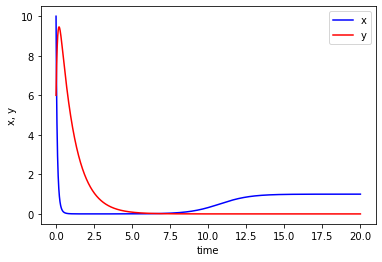

In [407]:
# графік: 
pl(r)

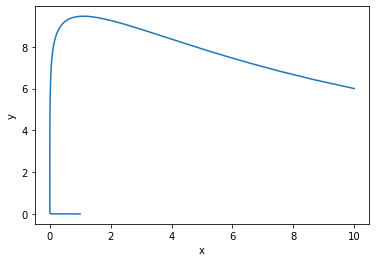

In [408]:
# фазовий портрет: 
phase_portrait(r)

##### Параметри: 1.7, 0.3, 0.1

In [409]:
eps = 1.7
gamma = 0.3
n = 0.1

In [410]:
# розв'язок: 
r = dr(eps, gamma, n)

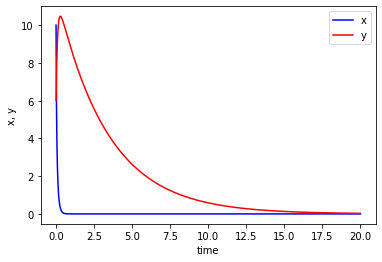

In [411]:
# графік: 
pl(r)

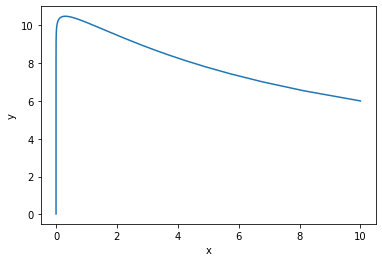

In [412]:
# фазовий портрет: 
phase_portrait(r)

##### Параметри: 0.7, 0.225, 0.4 

In [413]:
eps = 0.7
gamma = 0.225
n = 0.4

In [414]:
# розв'язок: 
r = dr(eps, gamma, n)

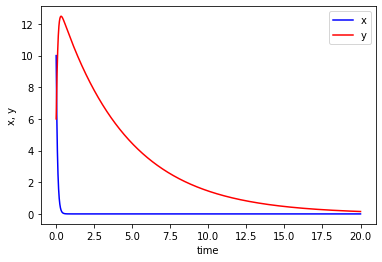

In [415]:
# графік: 
pl(r)

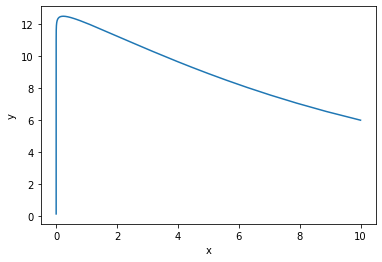

In [416]:
# фазовий портрет: 
phase_portrait(r)

##### Особливі точки та їх тип

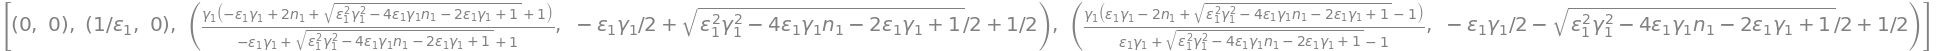

In [417]:
# символьні змінні
x,y = sym.symbols('x,y') 
eps1 = sym.Symbol('epsilon1')
gamma1 = sym.Symbol('gamma1')
n1 = sym.Symbol('n1')
# вирази: 
f = sym.Eq(x-x*y-eps1*x**2, 0)
g = sym.Eq(-gamma1*y+(x*y**2)/(n1+y), 0)
sym.solve([f,g],(x,y))

In [418]:
# Якобіан: 
Jacobian('x , y', ['x-x*y-1*x**2','-1*y+(x*y**2)/(1+y)'])

⎡-2⋅x - y + 1            -x          ⎤
⎢                                    ⎥
⎢      2              2              ⎥
⎢     y            x⋅y      2⋅x⋅y    ⎥
⎢   ─────      - ──────── + ───── - 1⎥
⎢   y + 1               2   y + 1    ⎥
⎣                (y + 1)             ⎦

In [419]:
# функція для визначення типу особливих точок: 
def type_point(x, y): 
  C[0,0] = -2*x-y+1
  C[0,1] = -x
  C[1,0] = (y**2)/(y+1)
  C[1,1] = (-(x*y**2)/(y+1)**2) + (2*x*y)/(y+1) - 1
  return np.linalg.eigvals(C) 

##### Параметри: 1, 1, 1

In [420]:
# Параметри моделі 
eps = 1
gamma = 1
n = 1

In [421]:
# підставляємо параметри:  
f = sym.Eq(x-x*y-eps*x**2, 0)
g = sym.Eq(-gamma*y+(x*y**2)/(n+y), 0)
sym.solve([f,g],(x,y))

In [422]:
D = sym.solve([f, g], (x,y))
coord_list = [v.round(2) for t in D for v in t]
coord_list 

In [423]:
type_point(0, 0) 

array([ 1., -1.])

In [424]:
type_point(1, 0) 

array([-1., -1.])

In [425]:
B = np.zeros((2,2), dtype=complex) 

In [426]:
x = 1-1j
y = 1j
B[0,0] = -2*x-y+1
B[0,1] = -x
B[1,0] = (y**2)/(y+1)
B[1,1] = (-(x*y**2)/(y+1)**2) + (2*x*y)/(y+1) - 1
np.linalg.eigvals(B)  

array([-1.28077641+1.28077641j,  0.78077641-0.78077641j])

In [427]:
x = 1+1j
y = -1j
B[0,0] = -2*x-y+1
B[0,1] = -x
B[1,0] = (y**2)/(y+1)
B[1,1] = (-(x*y**2)/(y+1)**2) + (2*x*y)/(y+1) - 1
np.linalg.eigvals(B)  

array([-1.28077641-1.28077641j,  0.78077641+0.78077641j])

##### Параметри: 1.7, 0.3, 0.1

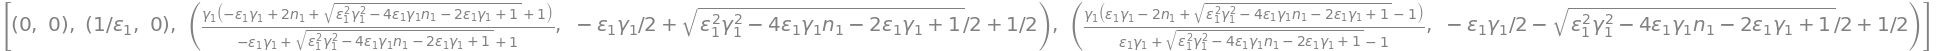

In [428]:
# символьні змінні 
x,y = sym.symbols('x,y') 
eps1 = sym.Symbol('epsilon1')
gamma1 = sym.Symbol('gamma1')
n1 = sym.Symbol('n1')
# вирази: 
f = sym.Eq(x-x*y-eps1*x**2, 0)
g = sym.Eq(-gamma1*y+(x*y**2)/(n1+y), 0)
sym.solve([f,g],(x,y))

In [429]:
# Параметри моделі 
eps = 1.7
gamma = 0.3
n = 0.1

In [430]:
# підставляємо параметри: 
f = sym.Eq(x-x*y-eps*x**2, 0)
g = sym.Eq(-gamma*y+(x*y**2)/(n+y), 0)
sym.solve([f,g],(x,y))

In [431]:
D = sym.solve([f, g], (x,y)) 
coord_list = [v.round(2) for t in D for v in t]
coord_list

In [432]:
type_point(0, 0) 

array([ 1., -1.])

In [433]:
type_point(0.39, 0.34) 

array([-0.17129542, -0.77590218])

In [434]:
type_point(0.5, 0.15) 

array([-0.16369388, -0.86437795])

In [435]:
type_point(0.59, 0.0) 

array([-0.18, -1.  ])

##### Параметри: 0.7, 0.225, 0.4 

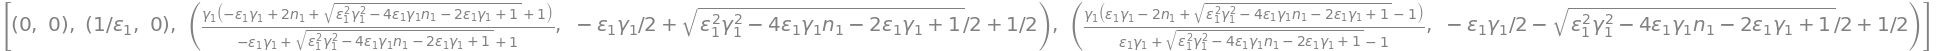

In [436]:
# символьні змінні
x,y = sym.symbols('x,y') 
eps1 = sym.Symbol('epsilon1')
gamma1 = sym.Symbol('gamma1')
n1 = sym.Symbol('n1')
# вирази: 
f = sym.Eq(x-x*y-eps1*x**2, 0)
g = sym.Eq(-gamma1*y+(x*y**2)/(n1+y), 0)
sym.solve([f,g],(x,y))

In [437]:
# Параметри моделі 
eps = 0.7
gamma = 0.225
n = 0.4

In [438]:
# підставляємо параметри: 
f = sym.Eq(x-x*y-eps*x**2, 0)
g = sym.Eq(-gamma*y+(x*y**2)/(n+y), 0)
sym.solve([f,g],(x,y)) 

In [439]:
D = sym.solve([f, g], (x,y))
coord_list = [v.round(2) for t in D for v in t]
coord_list 

In [440]:
type_point(0.0, 0.0) 

array([ 1., -1.])

In [441]:
type_point(0.34, 0.76) 

array([-0.6048812+0.29050991j, -0.6048812-0.29050991j])

In [442]:
type_point(1.31, 0.08) 

array([-1.69115881, -0.82195505])

In [443]:
type_point(1.43, 0.0) 

array([-1.86, -1.  ])

#### Система (2)

![model](model_2_1.png)

![model](model_2_2.png)

##### Розв'язки, графіки та фазовий портрет

In [444]:
# функція для обчислення правих частин системи
def right(r, t, c1, P1, c2, P2):
  x = r[0] # N1 - перший елемент масива 
  y = r[1] # N2 - другий елемент масива
  fx = -c1*x+P1*x*y # перше рівняння
  fy = -c2*y+P2*x*y # друге рівняння
  # для випадку з 2 малюнка, де c1=p1=1, c2=p2:
  # fx = -x*(1-y) # перше рівняння
  # fy = -c2*y*(1-x) # друге рівняння
  return array([fx, fy], float)

In [445]:
# функція для розв'язку системи ДР
def dr(c1, P1, c2, P2):
  r = odeint(right, r0, time, mxstep=5000, args = (c1, P1, c2, P2))
  return r

In [446]:
# Параметри моделі: 
c1 = 1
P1 = 1
c2 = 2
P2 = 2

In [447]:
# розв'язок: 
r = dr(c1, P1, c2, P2) 

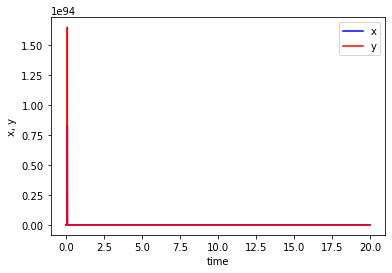

In [448]:
# графік: 
pl(r)

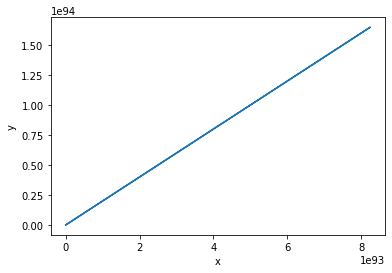

In [449]:
# фазовий портрет: 
phase_portrait(r)

##### Особливі точки, їх тип

In [450]:
# символьні змінні
x,y = sym.symbols('x,y') 
c1 = sym.Symbol('c1')
P1 = sym.Symbol('P1')
c2 = sym.Symbol('c2')
P2 = sym.Symbol('P2')
# вирази: 
f = sym.Eq(-c1*x+P1*x*y, 0)
g = sym.Eq(-c2*y+P2*x*y, 0)
sym.solve([f,g],(x,y))

In [451]:
# Параметри моделі 
c1 = 1 
P1 = 1
c2 = 1
P2 = 1

In [452]:
# підставляємо параметри: 
f = sym.Eq(-c1*x+P1*x*y, 0)
g = sym.Eq(-c2*y+P2*x*y, 0)
sym.solve([f,g],(x,y))

In [453]:
# Якобіан: 
Jacobian('x , y', ['-1*x+1*x*y','-1*y+1*x*y'])

⎡y - 1    x  ⎤
⎢            ⎥
⎣  y    x - 1⎦

In [454]:
# функція для визначення типу особливих точок: 
def type_point(x, y): 
  C[0,0] = y-1
  C[0,1] = x
  C[1,0] = y
  C[1,1] = x-1
  return np.linalg.eigvals(C) 

In [455]:
type_point(0, 0) 

array([-1., -1.])

In [456]:
type_point(1, 1) 

array([ 1., -1.])